File name needs to be updated

In [1]:
import pandas as pd
from IPython.display import display
import re
from datetime import datetime
import matplotlib.pyplot as plt
# read file
df = pd.read_csv('C:/Users/yali.li/Documents/LIMS_Query/Urea_Revenue/01-07_Urea.csv',sep = ',', header = None, encoding = 'unicode_escape') 
#add header 
df.columns = ['WO#', 'Company', 'Customer', 'Quantity', 'Unit_Price', 'Discount', 'Revenue', 'Time', 'Priority', 'Item_Code', 'Billing_Desc', 'Invoice_Data', 'Data_Created', 'Territory', 'Location','Lab', 'Salesperson']


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WO#           108 non-null    object 
 1   Company       108 non-null    object 
 2   Customer      108 non-null    object 
 3   Quantity      108 non-null    int64  
 4   Unit_Price    108 non-null    int64  
 5   Discount      108 non-null    int64  
 6   Revenue       108 non-null    float64
 7   Time          108 non-null    object 
 8   Priority      108 non-null    object 
 9   Item_Code     108 non-null    object 
 10  Billing_Desc  108 non-null    object 
 11  Invoice_Data  108 non-null    object 
 12  Data_Created  108 non-null    object 
 13  Territory     108 non-null    object 
 14  Location      108 non-null    object 
 15  Lab           108 non-null    object 
 16  Salesperson   108 non-null    object 
dtypes: float64(1), int64(3), object(13)
memory usage: 14.5+ KB


In [3]:
df.head()

,WO#,Company,Customer,Quantity,Unit_Price,Discount,Revenue,Time,Priority,Item_Code,Billing_Desc,Invoice_Data,Data_Created,Territory,Location,Lab,Salesperson
0,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH
1,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH
2,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH
3,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH
4,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH


calculate # of Priority samples

In [4]:
df_Priority = df[df['Billing_Desc'].str.match("Priority", flags=re.IGNORECASE)] #flags means it is case insensitive
Priority_Sample = df_Priority['Quantity'].sum()
print('The number of priority samples is: ', Priority_Sample)

The number of priority samples is:  0


Figure out # of companies worked with and respective sample number and revenue

In [5]:
#extract month from Invoice_Data column
Month=[datetime.strptime(i, '%m/%d/%Y %H:%M').month for i in df['Invoice_Data']]

In [6]:
#add a column 'Month' to the df
df['Month']=Month
df.head()

,WO#,Company,Customer,Quantity,Unit_Price,Discount,Revenue,Time,Priority,Item_Code,Billing_Desc,Invoice_Data,Data_Created,Territory,Location,Lab,Salesperson,Month
0,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH,5
1,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH,5
2,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH,5
3,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH,5
4,22-04595,SUEZ WTS SOLUTIONS USA INC,PAUL MUELLER,1,289,0,289.0,EA,N,G0290-GCL-N-R,Urea Analysis in UPW,5/17/2022 0:00,4/20/2022 10:06,MIDW,FREMONT,ORGANIC,JERRY.SMITH,5


In [7]:
#generate a summary table
df = df.groupby(['Month','Company']).sum()[['Quantity','Revenue']]
df

Quantity  Revenue
Month Company                                             
5     INTEL CORP                               18  4161.60
      OVIVO SWITZERLAND AG                      5  1372.75
      SACHEM INC                               10  2890.00
      SUEZ WTS SOLUTIONS USA INC                8  2312.00
6     CITY OF MANASSAS                          2   578.00
      INTEL CORP                               27  6242.40
      SACHEM INC                                5  1445.00
      SUEZ WTS SOLUTIONS USA INC                6  1734.00
7     AVANTOR PERFORMANCE MATERIALS LLC         4  1156.00
      INTEL CORP                                6  1387.20
      SACHEM INC                                5  1445.00
      SUEZ WTS SOLUTIONS USA INC               12  3468.00

In [8]:
#calculate monthly summary
df_monthly=df.groupby(['Month']).sum()[['Quantity', 'Revenue']]
df_monthly

,Quantity,Revenue
Month,,
5,41,10736.35
6,40,9999.40
7,27,7456.20


In [9]:
#annual total revenue
G0290_Revenue_2022 = df_monthly['Revenue'].sum()
G0290_Revenue_2022

28191.95

In [10]:
#annual total # of samples
G0290_Samples_2022 = df_monthly['Quantity'].sum()
G0290_Samples_2022

108

Further dig into the data, monthly revenue, monthly # of samplels, etc.

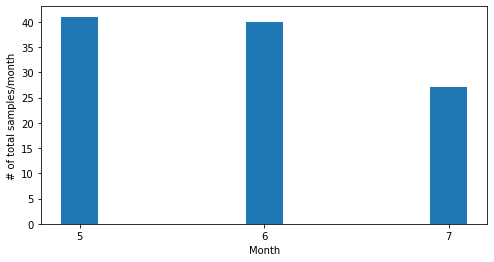

In [11]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Quantity'],  width=0.2)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('# of total samples/month')
plt.show()

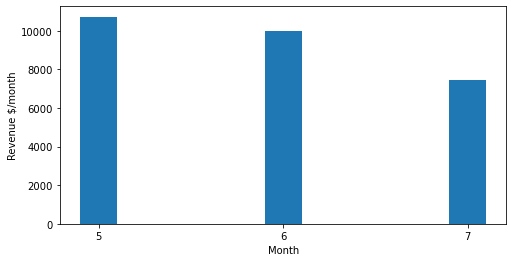

In [12]:
plt.figure(figsize = (8,4))
plt.bar(df_monthly.index.values, df_monthly['Revenue'],  width=0.2)
plt.xticks(df_monthly.index.values)
plt.xlabel('Month')
plt.ylabel('Revenue $/month')
plt.show()